In [1]:
import trimesh
import urdfpy
import numpy as np
import open3d as o3d
# import point_cloud_utils as pcu
from urdf_util import write_urdf

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:

urdf_path = "urdf/RobotDog/RobotDog7kg.urdf"
urdf = urdfpy.URDF.load(urdf_path)

for link_name, link in urdf.link_map.items():
    print(link_name,link.inertial.mass)
np.sum([link.inertial.mass for link_name, link in urdf.link_map.items()])

base_link 4.944006724025301
body_1_1_1 0.17635098126357945
body_1_2_1 0.21988900237553521
body_1_3_1 0.2124436301601684
body_1_4_1 0.16803507345033536
body_2_1_1 0.4197478789995662
body_2_2_1 0.4725136412635692
body_2_3_1 0.39949807856162617
body_2_4_1 0.47989575308955273


7.492380763189233

In [3]:
urdf_path = "urdf/RobotDog/RobotDog7kg.urdf"
urdf = urdfpy.URDF.load(urdf_path)

for link_name, link in urdf.link_map.items():
    print(link_name,link.inertial.mass,link)
np.sum([link.inertial.mass for link_name, link in urdf.link_map.items()])
scale = 0.32  # scale mass/inertia
for link_name, link in urdf.link_map.items():
    link.inertial.mass*=scale
    link.inertial.inertia*=scale
urdf.save("urdf/RobotDog/RobotDog3kg.urdf")

base_link 4.944006724025301 <urdfpy.urdf.Link object at 0x7fbf58348520>
body_1_1_1 0.17635098126357945 <urdfpy.urdf.Link object at 0x7fbf58352130>
body_1_2_1 0.21988900237553521 <urdfpy.urdf.Link object at 0x7fbf582fe610>
body_1_3_1 0.2124436301601684 <urdfpy.urdf.Link object at 0x7fbf582f8970>
body_1_4_1 0.16803507345033536 <urdfpy.urdf.Link object at 0x7fbf58304c40>
body_2_1_1 0.4197478789995662 <urdfpy.urdf.Link object at 0x7fc11c13b1f0>
body_2_2_1 0.4725136412635692 <urdfpy.urdf.Link object at 0x7fbf58306fa0>
body_2_3_1 0.39949807856162617 <urdfpy.urdf.Link object at 0x7fbf582feac0>
body_2_4_1 0.47989575308955273 <urdfpy.urdf.Link object at 0x7fbf5830ebb0>


In [2]:
import yourdfpy
import lxml
from functools import partial
from itertools import chain
import os
import shutil
urdf_path = "urdf/RobotDog/RobotDog7kg.urdf"
urdf = yourdfpy.URDF.load(urdf_path,
                          build_scene_graph=False,
                          load_meshes=False,
                          load_collision_meshes=False,
                        #   filename_handler =partial(yourdfpy.filename_handler_relative_to_urdf_file,urdf_path)
                          # filename_handler = yourdfpy.filename_handler_null
                          )

In [5]:
def glob_urdf_mesh(urdf):
    """return unique mesh filenames from a URDF"""
    mesh_set = set()
    for link_name,link in urdf.link_map.items():
        for v in chain(link.collisions,link.visuals):
            if v.geometry is not None:
                mesh_set.add(v.geometry.mesh.filename)
    return mesh_set

print(glob_urdf_mesh(urdf))

new_urdf_path = "urdf/new/RobotDog7kg.urdf"
write_urdf(urdf,new_path=new_urdf_path,old_path=urdf_path,copy_mesh=True)

{'meshes/base_link.stl', 'meshes/leg2_1.stl', 'meshes/leg4_1.stl', 'meshes/leg1_1.stl', 'meshes/foot1_1.stl', 'meshes/leg3_1.stl', 'meshes/foot3_1.stl', 'meshes/foot2_1.stl', 'meshes/foot4_1.stl'}


In [97]:
new_urdf = yourdfpy.URDF.load(new_urdf_path)
new_urdf.scene

<trimesh.Scene(len(geometry)=9)>

In [84]:
import point_cloud_utils as pcu
# !pip install point_cloud_utils
import numpy as np
from urdf_util import get_urdf_scene, scene_to_vf,vf_to_mesh
import urdfpy
import trimesh
import os

In [3]:
# Load a mesh stored in my_mesh.ply:
#   v is a NumPy array of coordinates with shape (V, 3)
#   f is a NumPy array of face indices with shape (F, 3)
v, f = pcu.load_mesh_vf("/home/grl/repo/RobotsMakingRobots/Meshy_Pipeline/URDFs/BugBotBank/BugBot_top-x-0_bottom-x-0/meshes/base_link.stl")
v=v.copy(order='C')
# Generate random points on a sphere around the shape
p = np.random.randn(33, 3)
p /= np.linalg.norm(p, axis=-1, keepdims=True)

# Compute the shortest distance between each point in p and the mesh:
#   dists is a NumPy array of shape (P,) where dists[i] is the
#   shortest distnace between the point p[i, :] and the mesh (v, f)
dists, fid, bc = pcu.closest_points_on_mesh(p, v, f)

# Interpolate the barycentric coordinates to get the coordinates of 
# the closest points on the mesh to each point in p
closest_pts = pcu.interpolate_barycentric_coords(f, fid, bc, v)

In [1]:
import pathlib
import os
import trimesh
import urdfpy
import numpy as np
import open3d as o3d
import yourdfpy
from urdf_util import scene_to_vf,vf_to_mesh


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
num_samples = 10000

parent_path = pathlib.Path("/home/grl/repo/RobotsMakingRobots/Meshy_Pipeline/URDFs/BugBotBank/")
robot_dict ={}
for sub_directory_path in parent_path.iterdir():
    if sub_directory_path.is_dir():
        urdf_path = next(sub_directory_path.rglob("*.urdf"))
        model_name = os.path.basename(urdf_path.parent)
        urdf = yourdfpy.URDF.load(str(urdf_path))
        robot_dict[model_name] = {"urdf":urdf}

In [43]:
for k in robot_dict:
    robot_k = robot_dict[k]
    robot_k["vertices"], robot_k["faces"] = scene_to_vf((robot_k["urdf"].scene))
    robot_k["mesh"] = vf_to_mesh(robot_k["vertices"], robot_k["faces"],return_type='o3d')

for k in robot_dict:
    robot_k = robot_dict[k]
    robot_k["vertices"], robot_k["faces"] = scene_to_vf((robot_k["urdf"].scene))
    # long running funtion vf_to_mesh
    robot_k["mesh"] = vf_to_mesh(robot_k["vertices"], robot_k["faces"],return_type='o3d')
    robot_k["pcd"] = robot_k["mesh"].sample_points_uniformly(number_of_points=num_samples)
    # robot_k["sampled_points"] = np.asarray(robot_k["pcd"].points)
    robot_k["pcd_distance"] = dict()
    robot_k["chamfer_distance"] = dict()

for k in robot_dict:
    robot_k = robot_dict[k]
    pcd_k = robot_k["pcd"]
    for j in robot_dict:
        if k!=j:
            pcd_j = robot_dict[j]["pcd"]
            robot_k["pcd_distance"][j] = np.asarray(pcd_k.compute_point_cloud_distance(pcd_j)).mean()
        
    
for k in robot_dict:
    for j in robot_dict:
        if k!=j:
            robot_dict[k]["chamfer_distance"][j] = (robot_dict[k]["pcd_distance"][j] +  
                                                    robot_dict[j]["pcd_distance"][k])*0.5 
for k in robot_dict:
    robot_dict[k]["chamfer_distance_mean"] = np.mean(np.fromiter(robot_dict[k]["chamfer_distance"].values(),dtype=float))

In [96]:
num_population = 10
num_generation = 20
robot_names = list(robot_dict.keys())
generations = [{robot_names[k]:robot_dict[robot_names[k]] for 
                k in np.random.choice(len(robot_dict),size=num_population,replace=False)} 
               for m in range(num_generation)]

In [97]:
diversity = np.zeros((num_generation,num_population))
for i,gen in enumerate(generations):
        for j,name_j in enumerate(gen):
            d = 0
            for name_k in gen:
                if name_j!=name_k:
                    d+=gen[name_j]["chamfer_distance"][name_k]
            diversity[i,j] = d

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")


generation_indices = np.repeat(np.arange(num_generation),num_population)
diversity_flat = diversity.ravel()


In [107]:
num_generation

20

In [108]:
generation_indices

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19])

In [109]:
# plt.plot(generation_indices,diversity_flat,".")

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

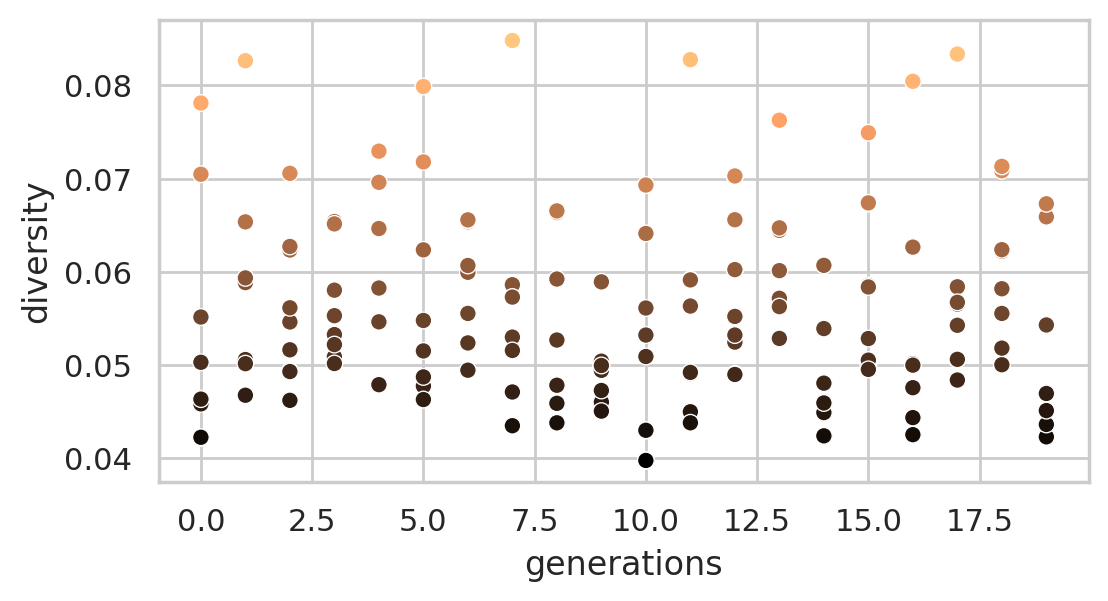

In [118]:
df = pd.DataFrame({"generations":generation_indices,"diversity":diversity_flat})
ax = plt.figure(figsize=(6,3),dpi=200).gca()
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
sns.scatterplot(df,x="generations",y="diversity",hue='diversity',palette='copper',legend=None)
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(range(0,num_generation+1,2))

plt.show()

In [14]:
urdf_1 = urdfpy.URDF.load("/home/grl/repo/RobotsMakingRobots/Meshy_Pipeline/URDFs/BugBotBank/BugBot_top-x-0_bottom-x-0/BugBot_top-x-0_bottom-x-0.urdf")
urdf_2 = urdfpy.URDF.load("/home/grl/repo/RobotsMakingRobots/Meshy_Pipeline/URDFs/BugBotBank/BugBot_top-x-1_bottom-x-1/BugBot_top-x-1_bottom-x-1.urdf")


urdf_list = [urdf_1,urdf_2]
vf_list = [scene_to_vf(get_urdf_scene(urdf_1)) for urdf in urdf_list]



mesh_1 = vf_to_mesh(*scene_to_vf(get_urdf_scene(urdf_1)),return_type='o3d')
mesh_2 = vf_to_mesh(*scene_to_vf(get_urdf_scene(urdf_2)),return_type='o3d')


# mesh_1.compute_vertex_normals()
# mesh_2.compute_vertex_normals()



In [18]:
num_samples=10000000

# Sample points on the surfaces of the meshes
pcd_1 = mesh_1.sample_points_uniformly(number_of_points=num_samples)
pcd_2 = mesh_2.sample_points_uniformly(number_of_points=num_samples)

pcd_1_points = np.asarray(pcd_1.points)
pcd_2_points = np.asarray(pcd_2.points)


# import point_cloud_utils as pcu

# vertices_1,faces_1 =scene_to_vf(get_urdf_scene(urdf_1))
# vertices_2,faces_2 =scene_to_vf(get_urdf_scene(urdf_2))

# # Compute the shortest distance between each point in p and the mesh:
# #   dists is a NumPy array of shape (P,) where dists[i] is the
# #   shortest distnace between the point p[i, :] and the mesh (v, f)
# dists, fid, bc = pcu.closest_points_on_mesh(pcd_1_points, vertices_1,faces_1)


In [ ]:
distances_1_2

In [19]:
distances_1_2 = pcd_1.compute_point_cloud_distance(pcd_2)
distances_2_1 = pcd_2.compute_point_cloud_distance(pcd_1)

print(np.asarray(distances_1_2).mean())
print(np.asarray(distances_2_1).mean())


0.0013761433571973392
0.0015528037146763155


In [51]:
distances_1_1 =pcd_1.compute_point_cloud_distance(mesh_1.sample_points_uniformly(number_of_points=num_samples))

In [52]:
np.asarray(distances_1_1).mean()

0.0012901442193387388

In [32]:
import point_cloud_utils as pcu
# Compute the shortest distance between each point in p and the mesh:
#   dists is a NumPy array of shape (P,) where dists[i] is the
#   shortest distnace between the point p[i, :] and the mesh (v, f)
dists, fid, bc = pcu.closest_points_on_mesh(pcd_1_points, vertices_1,faces_1)

In [34]:
np.mean(dists)

2.656706469298729e-17

In [37]:
bc

array([[0.1411628 , 0.19164342, 0.66719378],
       [0.38697047, 0.10641391, 0.50661562],
       [0.85441298, 0.03814098, 0.10744604],
       ...,
       [0.27914015, 0.23088799, 0.48997186],
       [0.11477261, 0.2686243 , 0.61660309],
       [0.09971215, 0.76986078, 0.13042707]])

In [18]:
o3d.visualization.draw_geometries([mesh_1,pcd_1])

In [ ]:
def chamfer_distance_o3d(mesh_1, mesh_2, num_samples=10000):
    """Calculates the Chamfer distance between two Open3D meshes.

    Args:
        mesh1: The first open3d.geometry.TriangleMesh object.
        mesh2: The second open3d.geometry.TriangleMesh object.
        num_samples: The number of points to sample from each mesh (default: 10000).

    Returns:
        The Chamfer distance as a float.
    """
    
    # Sample points on the surfaces of the meshes
    pcd_1 = mesh_1.sample_points_uniformly(number_of_points=num_samples)
    pcd_2 = mesh_2.sample_points_uniformly(number_of_points=num_samples)

    # Create KDTree for nearest neighbor search
    kdtree_1 = o3d.geometry.KDTreeFlann(mesh_1)
    kdtree_2 = o3d.geometry.KDTreeFlann(mesh_2)

    # Calculate distances from pcd1 to mesh2
    distances1 = np.zeros(num_samples)
    for i in range(num_samples):
        [_, idx, _] = kdtree_2.search_knn_vector_3d(pcd_1.points[i], 1)
        distances1[i] = np.linalg.norm(pcd_1.points[i] - mesh_2.vertices[idx[0]])

    # Calculate distances from pcd2 to mesh1
    distances2 = np.zeros(num_samples)
    for i in range(num_samples):
        [_, idx, _] = kdtree_1.search_knn_vector_3d(pcd_2.points[i], 1)
        distances2[i] = np.linalg.norm(pcd_2.points[i] - mesh_1.vertices[idx[0]])

    # Average the distances and return
    return (np.mean(distances1) + np.mean(distances2)) / 2

In [12]:
def chamfer_distance(mesh1, mesh2, num_samples=10000):
    """Calculates the Chamfer distance between two trimesh meshes.

    Args:
        mesh1: The first trimesh.Trimesh object.
        mesh2: The second trimesh.Trimesh object.
        num_samples: The number of points to sample from each mesh (default: 10000).

    Returns:
        The Chamfer distance as a float.
    """
    points1 = trimesh.sample.sample_surface(mesh1, num_samples)[0]  # Sample points from mesh1
    points2 = trimesh.sample.sample_surface(mesh2, num_samples)[0]  # Sample points from mesh2

    # Calculate distances from points1 to mesh2
    closest_points1, _, _ = mesh2.nearest.on_surface(points1)
    distances1 = np.linalg.norm(points1 - closest_points1, axis=1)

    # Calculate distances from points2 to mesh1
    closest_points2, _, _ = mesh1.nearest.on_surface(points2)
    distances2 = np.linalg.norm(points2 - closest_points2, axis=1)

    # Average the distances and return
    return (np.mean(distances1) + np.mean(distances2)) / 2



# Load a mesh stored in my_mesh.ply:
#   v is a NumPy array of coordinates with shape (V, 3)
#   f is a NumPy array of face indices with shape (F, 3)
v, f = pcu.load_mesh_vf("/home/grl/repo/RobotsMakingRobots/Meshy_Pipeline/URDFs/BugBotBank/BugBot_top-x-0_bottom-x-0/meshes/base_link.stl")
v=v.copy(order='C')
# Generate random points on a sphere around the shape
p = np.random.randn(33, 3)
p /= np.linalg.norm(p, axis=-1, keepdims=True)

# Compute the shortest distance between each point in p and the mesh:
#   dists is a NumPy array of shape (P,) where dists[i] is the
#   shortest distnace between the point p[i, :] and the mesh (v, f)
dists, fid, bc = pcu.closest_points_on_mesh(p, v, f)

# Interpolate the barycentric coordinates to get the coordinates of 
# the closest points on the mesh to each point in p
closest_pts = pcu.interpolate_barycentric_coords(f, fid, bc, v)

ImportError: cannot import name 'NearestIndex' from 'trimesh' (/home/grl/repo/micromamba/envs/py38/lib/python3.8/site-packages/trimesh/__init__.py)

In [10]:
%timeit mesh_list = [scene_to_mesh(get_urdf_scene(urdf)) for urdf in urdf_list]

43.2 ms ± 522 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
chamfer_distance(mesh_list[0], mesh_list[1])

0.0014017028765033054

In [22]:

scene = get_urdf_scene(urdf_1)
mesh = vf_to_mesh(*triangles_to_vf(scene.triangles),return_type="trimesh")
mesh.show()

In [ ]:
o3d